In [1]:
import sys, os
sys.path.append('..')
os.chdir('..')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plot_data = [
    {
        'title': 'Training loss',
        'columns': [
            ('train_va', 'valence-arousal'),
            ('train_expr', 'expression'),
        ]
    },
    {
        'title': 'Validation CCC',
        'columns': [
            ('ccc_v', 'valence CCC'),
            ('ccc_a', 'arousal CCC'),
            ('ccc_mean', 'mean CCC'),
        ]
    },
    # {
    #     'title': 'RMSE',
    #     'columns': [
            # ('rmse_v', 'valence'),
            # ('rmse_a', 'arousal'),
    #     ]
    # }
    {
        'title': 'Validation accuracy (expressions)',
        'columns': [
            ('expr_acc', None),
        ]
    }
]

C:\Users\stirl\AppData\Local\Temp\ipykernel_4148\1757513108.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[idx].legend()


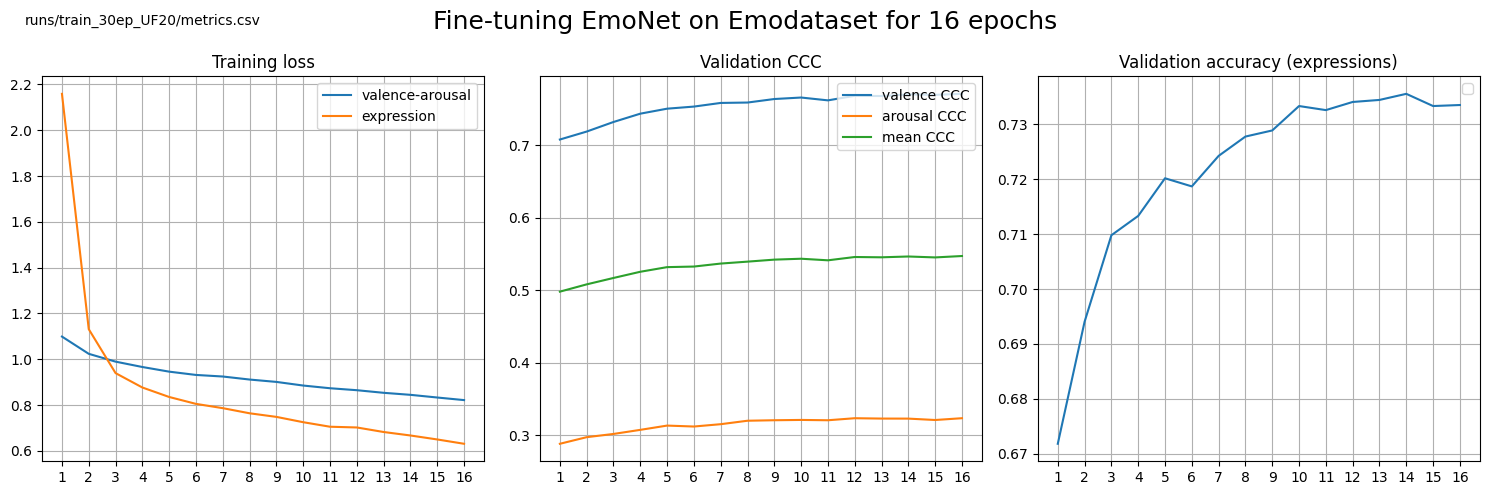

In [6]:
# PLOT

# read csv into dataframe
files = [
    'runs/train_10ep/metrics.csv',
    'runs/train_5ep/metrics.csv',
    'runs/train_50ep/metrics.csv',
    'runs/train_50ep_CONT_unfreeze_3ep/metrics.csv',
    'runs/train_cont_lr3-5/metrics.csv',
    'runs/train_30ep_UF20/metrics.csv',
]
fn = files[-1]
df = pd.read_csv(fn)

# make plot
fig, ax = plt.subplots(ncols=len(plot_data), figsize=(5*len(plot_data), 5))
fig.suptitle(f'Fine-tuning EmoNet on Emodataset for {df["epoch"].max()} epochs', size=18)
fig.text(0.02, 0.95, fn)

for idx, data in enumerate(plot_data):
    ax[idx].set_title(data['title'])
    for column, name in data['columns']:
        ax[idx].plot(df['epoch'], df[column], label=name)
    ax[idx].legend()
    ax[idx].set_xticks(range(1, df['epoch'].max()+1, 1))
    ax[idx].grid()

fig.tight_layout()
run_name = fn.replace('runs/', '').replace('/metrics.csv', '')
plt.savefig(f'data/emodataset/{run_name}.png')
plt.show()

In [ ]:
df.head()